# matplotlibの使い方

``matplotlib``と``pandas.DataFrame.plot``を組み合わせて利用する方法を確認します。

## モジュールのインポート

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {mpl.__version__}")


/var/folders/tv/9pv2t92113g5hw2kp4g351_00000gn/T/ipykernel_20654/3332130366.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


NumPy: 1.26.3
Pandas: 2.2.0
Matplotlib: 3.8.2


- ``matplotlib``で日本語フォントを使えるようにするために、``japanize_matplotlib``もインポート

## カラーマップ名の確認

In [ ]:
#mpl.colormaps()
#len(mpl.colormaps()) # 170

- 利用可能なカラーマップ名は``matplotlib.colormaps``で確認
- カラーマップ名は170種類

## 適当なサンプルデータの作成

In [5]:
samples = [
    {
        "x": random.gauss(),
        "y": random.uniform(4, 8),
        "z": random.randint(0, 10),
        "name": random.choice(["Alice", "Bob", "Carol", "David"])
    } for i in range(1000)]
data = pd.DataFrame(samples)
# data

- 乱数モジュール（``random``）を使って、サンプルデータを作成
-`(x, y, z, name)`の組み合わせを作成

# プロットを作成する

matplotlib.axes._axes.Axes

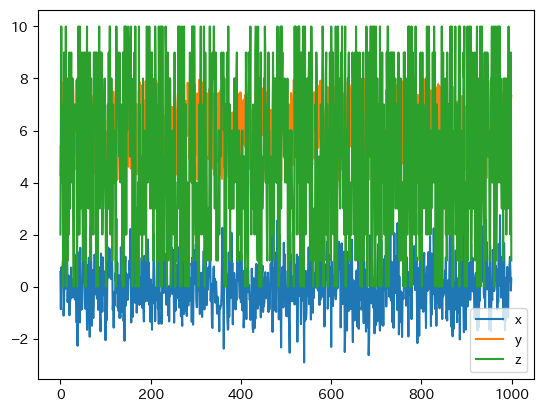

In [6]:
ax = data.plot()
type(ax)

- ``pandas.DataFrame.plot()``でプロットを作成
- デフォルトは折れ線グラフ（数値データのみ）
- プロットは``matplotlib.axes.Axes``オブジェクト
  - ``ax``という変数は、`axis``から来ているのだと思う
  - 日本語だと``軸``なので、なぜグラフを示す変数になるのかピンと来ないのだけど、英語圏だと馴染みがあるのだろうか？

# サブプロットしたい

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

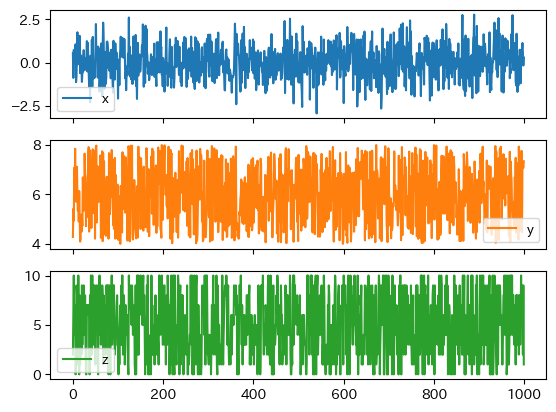

In [7]:
data.plot(subplots=True)

- ``subplots=True``オプションでサブプロットに自動分割

# 目盛りしたい

<Axes: >

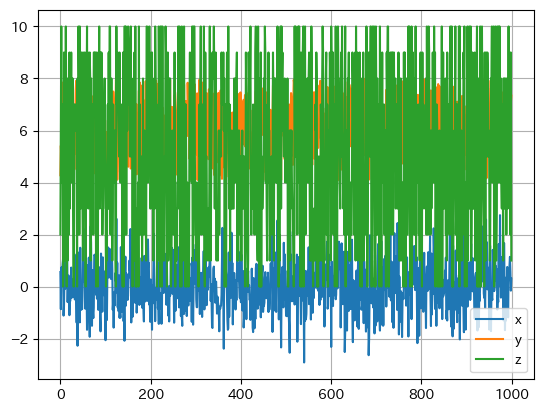

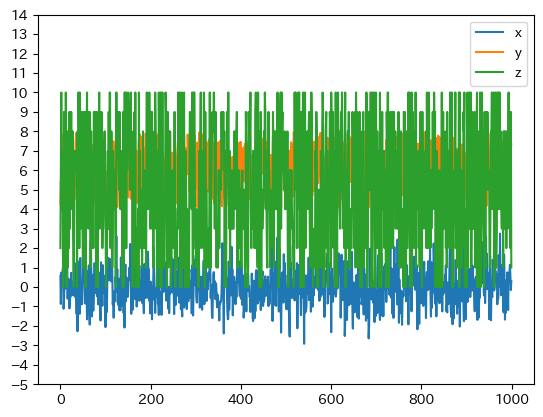

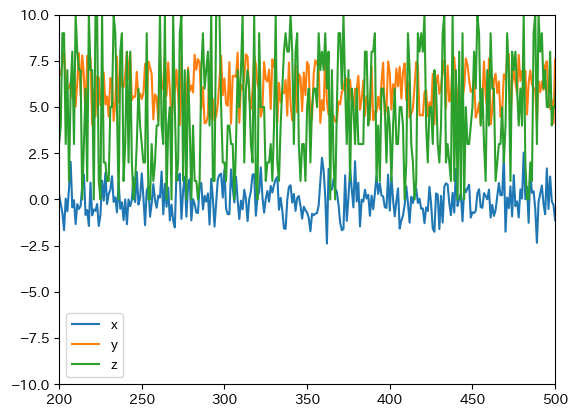

In [8]:
data.plot(grid=True)
data.plot(yticks=range(-5, 15, 1))
data.plot(xlim=(200, 500), ylim=(-10,10))

- ``grid=True``オプションで目盛りを表示

# 対数グラフしたい

<Axes: >

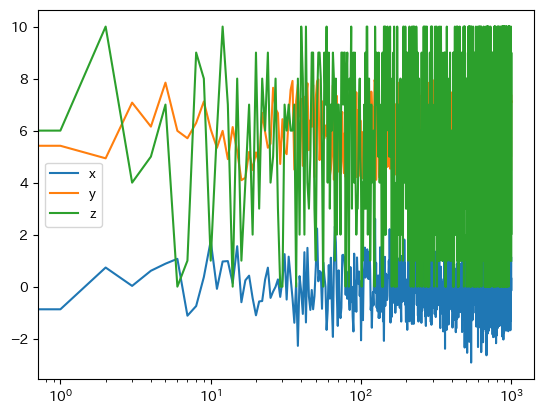

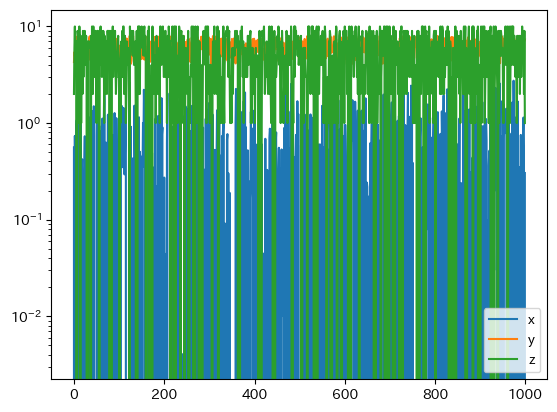

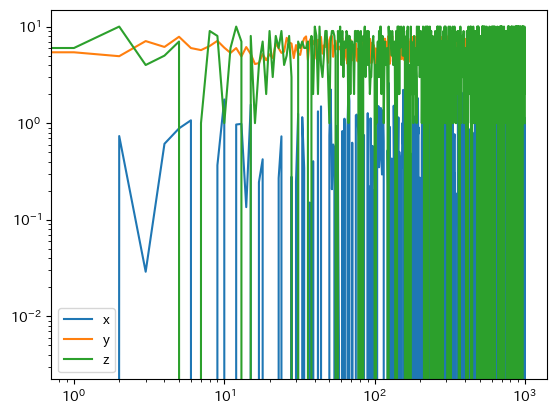

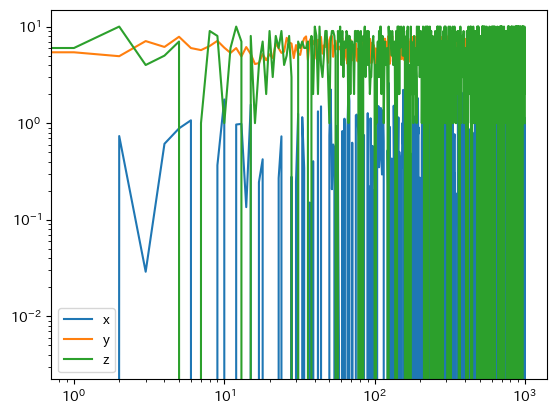

In [9]:
data.plot(logx=True)
data.plot(logy=True)
data.plot(logx=True, logy=True)
data.plot(loglog=True)

- ``logx=True``でX軸を対数にした片対数グラフ
- ``logy=True``でY軸を対数にした片対数グラフ
- ``loglog=True``（もしくは ``logx=True, logy=True``）で両対数グラフ

<Axes: title={'center': '積み上げヒストグラム'}, ylabel='Frequency'>

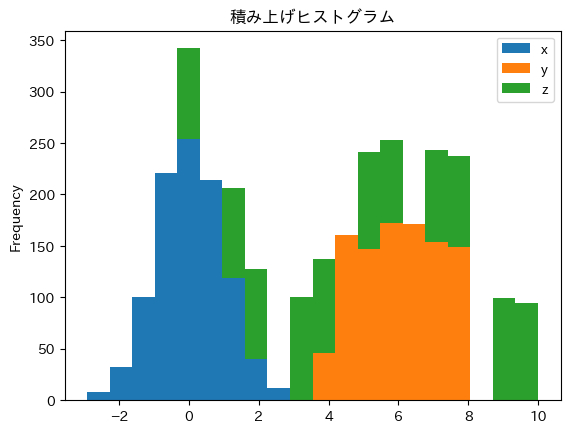

In [10]:
data.plot(kind="hist", stacked=True, bins=20, title="積み上げヒストグラム")

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

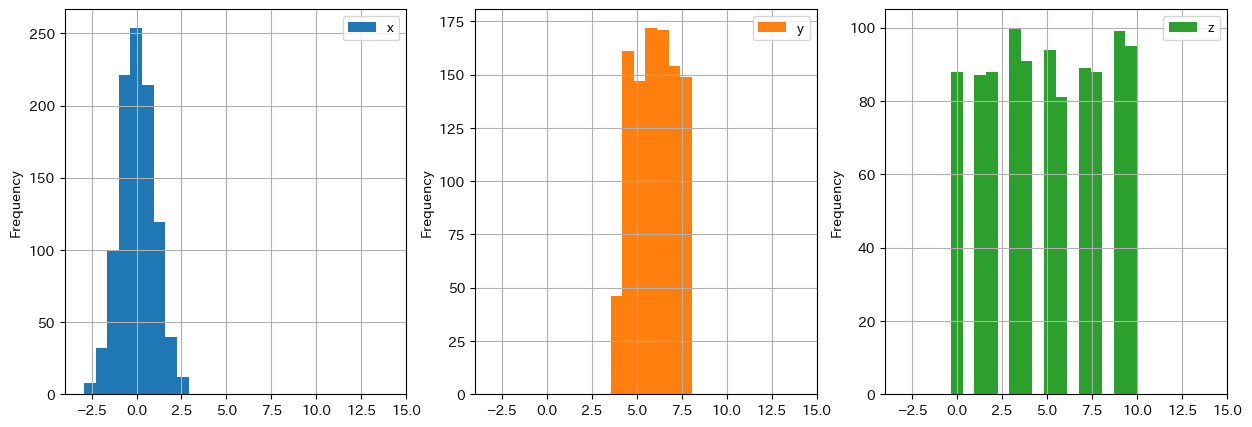

In [48]:
data[["x", "y", "z"]].plot.hist(xlim=(-4, 15), bins=20, stacked=True, grid=True, subplots=True, layout=(1, 3), figsize=(15, 5))
#data["y"].plot.hist(stacked=True)
#data["z"].plot.hist(stacked=True)

<Axes: ylabel='Frequency'>

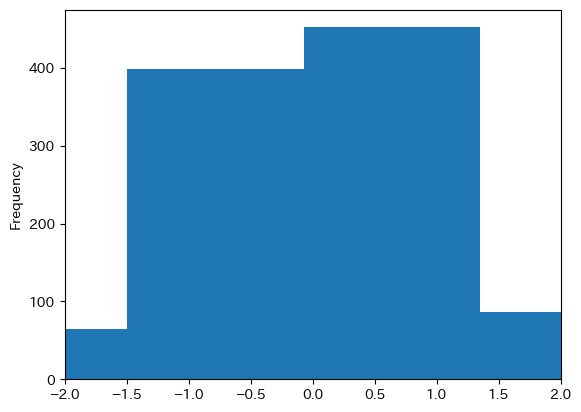

In [50]:
xmin, xmax = -2, 2
bins = xmax - xmin
data["x"].plot.hist(xlim=(xmin, xmax), bins=bins)

ROOTのような関数を作りたい

```cpp
TH1D *h1 = new TH1D("h1", "title", bins, xmin, xmax)
```

- エントリー数
- 平均値
- RMS
- Overflow
- Underflow

In [123]:
def hbar(data, x, bins, xmin, xmax):

    _data = data[[x]].copy()
    entries = len(_data)

    # Underflow
    q = f"{x} < {xmin}"
    uf = _data.query(q).count().iloc[0]

    # Overflow
    q = f"{x} > {xmax}"
    of = _data.query(q).count().iloc[0]

    # Valid
    q = f"{xmin} <= {x} <= {xmax}"
    v = _data.query(q)
    n = len(v)
    mean = v.mean().iloc[0]
    rms = v.std().iloc[0]

    r = {
        "entries": int(entries),
        "underflow": int(uf),
        "overflow": int(of),
        "mean": mean,
        "rms": rms
        }
    return r, v.plot.hist(bins=bins)

({'entries': 1000,
  'underflow': 0,
  'overflow': 0,
  'mean': 0.035368534419395255,
  'rms': 0.9639462838388788},
 <Axes: ylabel='Frequency'>)

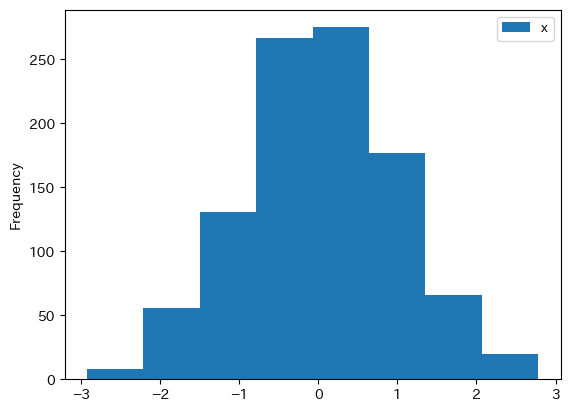

In [126]:
hbar(data, "x", 8, -4, 4)